In [1]:
import numpy as np
import chainer
from chainer import Chain, Variable
import chainer.functions as F
import chainer.links as L

import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
train, test = chainer.datasets.get_mnist()
xs, ts = train._datasets
txs, tts = test._datasets

Input = 

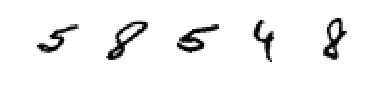

Label = 5,8,5,4,8,
Input = 

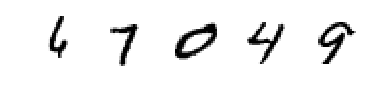

Label = 6,7,0,4,9,
Input = 

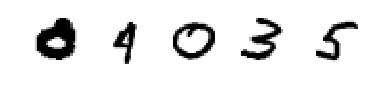

Label = 0,4,0,3,5,
Input = 

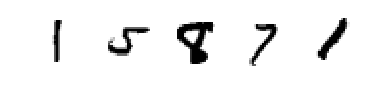

Label = 1,5,8,7,1,
Input = 

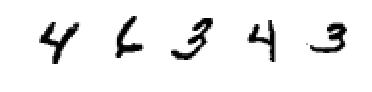

Label = 4,6,3,4,3,


In [3]:
def plot_mnist_data(data):
    n = len(data)
    for i in range(n):
        plt.subplot(1,5,i+1)
        plt.axis('off')
        plt.imshow(data[i].reshape(28,28), cmap=cm.gray_r, interpolation='nearest')
    plt.show()
        
def print_labels(data):
    n = len(data)
    for i in range(n):
        print(data[i][0], end=",")
    print()
    
for j in range(5):
    m_data = []
    m_label = []
    for i in range(5):
        k = random.randint(0, 10**4)
        x = xs[(k):(k+1)]
        t = ts[(k):(k+1)]
        m_data.append(x)
        m_label.append(t)
    print("Input = ", end = "")
    plot_mnist_data(m_data)
    print("Label = ", end = "")
    print_labels(m_label)

In [3]:
class NeuralNet(chainer.Chain):
    def __init__(self, n_units1, n_units2, n_out=10):
        super().__init__(
        l1 = L.Linear(None, n_units1),
        l2 = L.Linear(n_units1, n_units2),
        l3 = L.Linear(n_units2, n_out)
        )
    def __call__(self,x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return h3
    
def check_accuracy(model, xs, ts):
    ys = model(xs)
    loss = F.softmax_cross_entropy(ys, ts)
    ys = np.argmax(ys.data, axis=1)
    cors = (ys == ts)
    num_cors  = sum(cors)
    accuracy = num_cors / ts.shape[0]
    return accuracy, loss


In [5]:
?chainer.Chain

Init signature: chainer.Chain(**links)
Docstring:     
Composable link with object-like interface.

Composability is one of the most important features of neural nets. Neural
net models consist of many reusable fragments, and each model itself might
be embedded into a larger learnable system. Chain enables us to write a
neural net based on composition, without bothering about routine works like
collecting parameters, serialization, copying the structure with parameters
shared, etc.

This class actually provides a way to compose one or more links into one
structure. A chain can contain one or more *child links*. Child link is a
link registered to the chain with its own name. The child link is stored to
an attribute of the chain with the name. User can write a whole model or a
fragment of neural nets as a child class of Chain.

Each chain itself is also a link. Therefore, one can combine chains into
higher-level chains. In this way, links and chains construct a *link
hierarchy*. Link hie

In [5]:
bm = 100 
loss_history = []
accuracy_history = []

def train_nn(model, n_epochs):
    i_epochs = 0
    for i in range(n_epochs):
        for j in range(600):
            model.zerograds()
            x = xs[(j*bm):((j+1)*bm)]
            t = ts[(j*bm):((j+1)*bm)]
            t = Variable(np.array(t,"i"))
            y = model(x)
            loss = F.softmax_cross_entropy(y,t)
            loss.backward()
            optimizer.update()
            
        accuracy_train, loss_train = check_accuracy(model, xs, ts)
        accuracy_test, _ = check_accuracy(model, txs, tts)
        print("Epoch %d/%d, loss(train) = %f, accuracy(train)= %f, accuracy(test) = %f" 
              %(i_epochs +1, n_epochs, loss_train.data, accuracy_train, accuracy_test))
        loss_history.append(loss_train.data)
        accuracy_history.append(accuracy_test)
        i_epochs+=1
    return

In [6]:
n_h1 = 100
n_h2 = 100
model = NeuralNet(n_h1,n_h2)

optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

In [7]:
n_epoch = 10
train_nn(model, n_epoch)

Epoch 1/10, loss(train) = 0.404234, accuracy(train)= 0.854500, accuracy(test) = 0.849500
Epoch 2/10, loss(train) = 0.360861, accuracy(train)= 0.863833, accuracy(test) = 0.856100
Epoch 3/10, loss(train) = 0.324246, accuracy(train)= 0.873433, accuracy(test) = 0.863300
Epoch 4/10, loss(train) = 0.298168, accuracy(train)= 0.881500, accuracy(test) = 0.868800
Epoch 5/10, loss(train) = 0.284566, accuracy(train)= 0.885300, accuracy(test) = 0.870700
Epoch 6/10, loss(train) = 0.282463, accuracy(train)= 0.885617, accuracy(test) = 0.869500
Epoch 7/10, loss(train) = 0.270305, accuracy(train)= 0.889033, accuracy(test) = 0.870800
Epoch 8/10, loss(train) = 0.264848, accuracy(train)= 0.890067, accuracy(test) = 0.871000
Epoch 9/10, loss(train) = 0.262200, accuracy(train)= 0.890733, accuracy(test) = 0.869900
Epoch 10/10, loss(train) = 0.257591, accuracy(train)= 0.892050, accuracy(test) = 0.872500


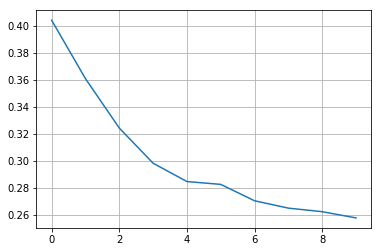

In [10]:
plt.grid()
plt.plot(loss_history) 

In [6]:
import chainer
import chainer.functions as F
import chainer.links as L

class MultiLayerPerceptron(chainer.Chain):

    def __init__(self, n_in, n_hidden, n_out):
        super(MultilayerPerceptron, self).__init__()
        with self.init_scope():
            self.layer1 = L.Linear(n_in, n_hidden)
            self.layer2 = L.Linear(n_hidden, n_hidden)
            self.layer3 = L.Linear(n_hidden, n_out)

    def __call__(self, x):
        # Forward propagation
        h1 = F.relu(self.layer1(x))
        h2 = F.relu(self.layer2(h1))
        return self.layer3(h2)


In [41]:
class MyModel(Chain):
    def __init__(self):
        in_size = 28*28
        out_size = 10
        super(MyModel, self).__init__(
        l1 = L.Linear(in_size,100),
        l2 = L.Linear(100,100),
        l3 = L.Linear(100,out_size)
        )
    def __call__(self,x,t):
        return F.softmax_cross_entropy(self.fwd(x),t)
    def fwd(self,x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
    
model = MyModel()
optimizer = optimizers.Adam()
optimizer.setup(model)
iterator = iterator.Serial
        

NameError: name 'optimizers' is not defined